In [1]:
import random
import math
from time import time
from scipy.stats import pearsonr

In [5]:
def compute_estimated(r_a, r_b):
    return 1. / (1. + 10.**((r_b - r_a) / 400.))

def compute_new_rating(r_a, k, win, e_a):
    _w = 1 if win else 0
    return r_a + k * (_w - e_a)

In [43]:


def compute(begin, end, step, sample=10, prob=0.9, elo_0=1500, k_0=40, k=20):
    weigths = [1.-prob, prob]
    original = [i for i in range(sample)]
    votes = begin
    accuracy = []

    t0 = time()

    while votes <= end:
        users2=random.sample(original, k=sample)
        users = {
            d: {"votes": 0, "elo": elo_0}
            for d in users2
        }

        for i in range(votes):
            a, b = random.sample(list(users), k=2)

            if a < b:
                tmp = [a, b]
            else:
                tmp = [b, a]

            winner = random.choices(tmp, weigths)[0]
            loser = b if winner == a else a

            estimate_winner = compute_estimated(users[winner]["elo"], users[loser]["elo"])
            estimate_loser = compute_estimated(users[loser]["elo"], users[winner]["elo"])

            new_elo_winner = compute_new_rating(
                users[winner]["elo"],
                k_0 if users[winner]["elo"] <= 0 else k,
                True,
                estimate_winner)

            new_elo_loser = compute_new_rating(
                users[loser]["elo"],
                k_0 if users[loser]["elo"] <= 0 else k,
                False,
                estimate_loser)

            users[winner]["votes"] += 1 
            users[loser]["votes"] += 1

            users[winner]["elo"] = new_elo_winner 
            users[loser]["elo"] = new_elo_loser

        tmp = [(k, v["elo"], v["votes"]) for k, v in users.items()]
        tmp.sort(key=lambda x: x[1], reverse=True)
        new = [i for i, _, _ in tmp]

        d = pearsonr(original, new)
        accuracy.append((votes, (d[0]+1.0) / 2.0))

        votes += step

    print(f"{(end-begin)//step:6} steps in {time()-t0:3.5} s.")
    
    return accuracy

   900 steps in 4.3029 s.


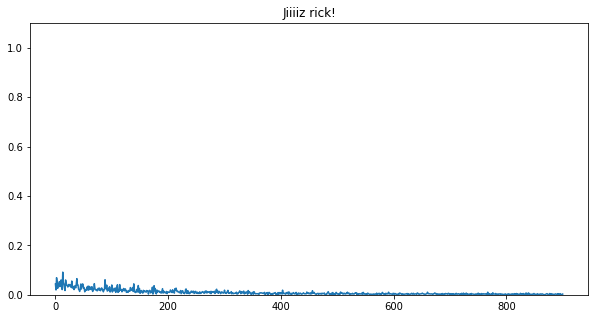

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = []
begin, end, step = 100, 1000, 1
sample = 20
MAX, S_STEP = 1000, 100

accuracy = compute(begin, end, step, sample, 1.0)

plt.figure(figsize=(10,5))
plt.title(f"Jiiiiz rick!")

plt.plot(list(zip(*accuracy))[1])

plt.ylim(0, 1.1)

plt.plot()
plt.draw()